In [ ]:
!pip install fastai


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import fastai
from fastai.vision.all import *
from fastai.vision.all import ImageDataLoaders


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:06<00:00, 39.8MB/s]
100% 163M/163M [00:06<00:00, 28.1MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
from pathlib import Path

In [ ]:
def label_func(fname):
    # assign label 0 to with_mask directory and 1 to without_mask directory
    return 0 if 'with_mask' in str(fname) else 1


In [ ]:
path = Path('./data')
dls = ImageDataLoaders.from_name_func(path, get_image_files(path), label_func=label_func, item_tfms=Resize(224), valid_pct=0.2, seed=42)


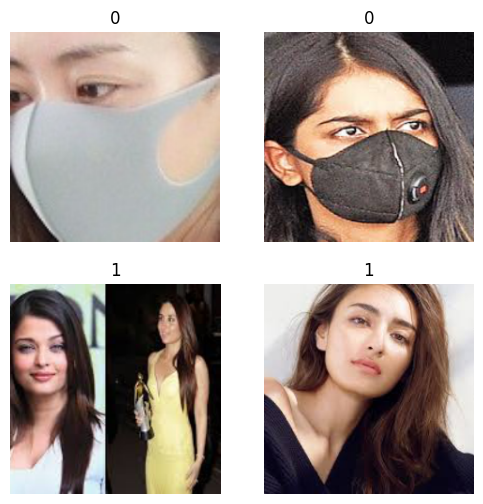

In [ ]:
dls.show_batch(max_n=4)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 144MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.180437,0.053194,0.019205,00:54


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.053327,0.032702,0.008609,00:50
1,0.029367,0.006212,0.002649,00:48
2,0.008996,0.005463,0.001325,00:49


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Export the model to pickle format

In [ ]:
learn.export('model.pkl')

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

Path of the image to be predicted: /megha.jpg


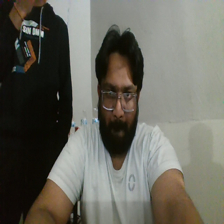

Predicted class: 0, Probability: 0.996415376663208
wearing a mask


In [ ]:
# load the trained model
learn = load_learner('/content/data/model.pkl')

# upload an image
input_image_path = input('Path of the image to be predicted: ')


input_image = cv2.imread(input_image_path)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
pil_image = Image.fromarray(input_image)
resized_image = pil_image.resize((224, 224))
resized_image.show()


# get the predicted class and probability
pred_class, pred_idx, outputs = learn.predict(resized_image)
prob = outputs[pred_idx]

print(f"Predicted class: {pred_class}, Probability: {prob}")
if pred_class == str(0):
  print("wearing a mask")
else :
  print("not wearing a mask")


In [ ]:
def mask_predict(image):
  pred_class, pred_idx, outputs = learn.predict(image)
  prob = outputs[pred_idx]

  print(f"Predicted class: {pred_class}, Probability: {prob}")
  if pred_class == str(0):
    text='Wearing a mask'
  else :
    text="not wearing a mask"
  return text


In [ ]:
def predict_image(image):
    # Convert PIL Image to numpy array
    image = np.array(image)
    # Preprocess image as needed
    # Make predictions using your image classification model
    predictions = mask_predict(image)
    # Return the predictions
    return predictions

In [ ]:
pip install gradio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.7/129.7 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.5/140.5 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.2/286.2 kB 37.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 k

UI Build and Launch

In [ ]:
import gradio as gr
input_image = gr.inputs.Image(label="Upload an image")
output_predictions = gr.outputs.Label(label="Predictions")

app = gr.Interface(fn=predict_image,inputs=input_image,
                   outputs=output_predictions,title='Face Mask Detection',
                   layout="vertical",
                   theme="huggingface")


/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/blocks.py:638: UserWarning: Cannot load huggingface. Caught Exception: The space huggingface does not exist
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)

In [ ]:
app.launch(share=True,debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://be2e73fe1f05f37bb1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


Predicted class: 0, Probability: 0.9999818801879883


Predicted class: 1, Probability: 0.9999914169311523
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://be2e73fe1f05f37bb1.gradio.live


In [ ]:
app.close()

Closing server running on port: 7860
